In [189]:
import pandas as pd
import seaborn as sns
import geopandas as gp
from matplotlib import pyplot as plt
sns.set_theme(context="paper", style="whitegrid", rc={"figure.figsize":(10,6)})
pd.options.mode.chained_assignment = None

# Statistics




## Collection of Raw Data

In [190]:
sudoc_total_downloaded = pd.read_csv("../raw_data_collection/output/sudoc_retrieved_raw_data.csv", low_memory=False)
bnf_total_downloaded = pd.read_csv("../raw_data_collection/output/bnf_retrieved_raw_data.csv", low_memory=False)
n_sudoc = len(sudoc_total_downloaded)
n_bnf = len(bnf_total_downloaded)
print(f"In the first run, we have downloaded {n_sudoc} records from SUDOC and {n_bnf} records from BNF, in sum {n_sudoc + n_bnf} records.")

In the first run, we have downloaded 37388 records from SUDOC and 11867 records from BNF, in sum 49255 records.


In [191]:
sudoc_add = pd.read_csv("../raw_data_collection/output/sudoc_raw_data_additional.csv", low_memory=False)
bnf_add = pd.read_csv("../raw_data_collection/output/bnf_raw_data_additional.csv", low_memory=False)
n_sudoc_add = len(sudoc_add)
n_bnf_add = len(bnf_add)
print(f"In the first run, we have downloaded {n_sudoc_add} records found through bigrams from SUDOC and {n_bnf_add} records found through bigrams from BNF, in sum {n_sudoc_add + n_bnf_add} records.")

In the first run, we have downloaded 25472 records found through bigrams from SUDOC and 22117 records found through bigrams from BNF, in sum 47589 records.


## Data Cleaning

After deduplication and data cleaning we obtain the following numbers:

In [192]:
bnf_discard = pd.read_csv("../data_cleaning/output/bnf_not_retained.csv", low_memory=False)
bnf_retained = pd.read_csv("../data_cleaning/output/bnf_all_diss_clean.csv", low_memory=False)
sudoc_discard = pd.read_csv("../data_cleaning/output/sudoc_not_retained.csv", low_memory=False)
sudoc_retained = pd.read_csv("../data_cleaning/output/sudoc_all_diss_clean.csv", low_memory=False)

print(f"We discard {len(bnf_discard)} records from BNF and {len(sudoc_discard)} records from SUDOC, because they may not be dissertations.")
print(f"We retain {len(bnf_retained)} records from BNF and {len(sudoc_retained)} records from SUDOC.")

We discard 8527 records from BNF and 6571 records from SUDOC, because they may not be dissertations.
We retain 17358 records from BNF and 38958 records from SUDOC.


## Dates

In [193]:
bnf_discard = pd.read_csv("../dates/output/bnf_date_discard.csv")
sudoc_discard = pd.read_csv("../dates/output/sudoc_date_discard.csv")

bnf_date_result_raw = pd.read_csv("../results/bnf_date_result.csv")
bnf_date_result = bnf_date_result_raw[bnf_date_result_raw["Year clean"].notna()]
sudoc_date_result_raw = pd.read_csv("../results/sudoc_date_result.csv")
sudoc_date_result = sudoc_date_result_raw[sudoc_date_result_raw["Year clean"].notna()]

print(f"We retain {len(bnf_date_result)} records and discard {len(bnf_discard)} records from BNF.")
print(f"We retain {len(sudoc_date_result)} records and discard {len(sudoc_discard)} records from SUDOC.")

We retain 17344 records and discard 14 records from BNF.
We retain 38602 records and discard 356 records from SUDOC.


## Persons

In [194]:
bnf_result = pd.read_csv("../results/bnf_persons_result.csv", index_col=[0], low_memory=False)
sudoc_result = pd.read_csv("../results/sudoc_persons_result.csv", index_col=[0], low_memory=False)
bnf_with_internal = bnf_result[(bnf_result["BNF ID 1"].notna())|
(bnf_result["BNF ID 2"].notna())|(bnf_result["BNF ID Cont"].notna())]
sudoc_with_internal = sudoc_result[(sudoc_result["SUDOC ID 1"].notna())|
(sudoc_result["SUDOC ID 2"].notna())|(sudoc_result["SUDOC ID 3"].notna())]
print(f"""{len(bnf_with_internal)} BNF records ({round(len(bnf_with_internal)/len(bnf_retained)*100,2)} %) contain \
at least one unique identifier for a participating person. {len(sudoc_with_internal)} SUDOC records \
({round(len(sudoc_with_internal)/len(sudoc_retained)*100,2)} %) contain at least one unique identifier for a participating person.""") 

17273 BNF records (99.51 %) contain at least one unique identifier for a participating person. 20333 SUDOC records (52.19 %) contain at least one unique identifier for a participating person.


In [195]:
bnf_with_id = pd.read_csv("../persons/output/bnf_pers_with_id.csv", index_col=[0]).drop_duplicates(subset="BNF ID")
sudoc_with_id = pd.read_csv("../persons/output/sudoc_pers_with_id.csv", index_col=[0]).drop_duplicates(subset="SUDOC ID")
print(f"We find {len(bnf_with_id)} unique identifiers in BNF data and {len(sudoc_with_id)} unique identifiers in SUDOC data.")

We find 15228 unique identifiers in BNF data and 8262 unique identifiers in SUDOC data.


In [196]:
bnf_with_viaf = pd.read_csv("../persons/output/bnf_with_viaf.csv", index_col=[0]).drop_duplicates(subset="old_bnf")
bnf_no_viaf_isni = bnf_with_viaf[(bnf_with_viaf["viaf"].isna())& (bnf_with_viaf["isni"].isna())]
print(f"{round(len(bnf_no_viaf_isni)/len(bnf_with_id)*100, 2)} % of BNF identifiers have no corresponding VIAF or ISNI identifier.")

88.49 % of BNF identifiers have no corresponding VIAF or ISNI identifier.


In [197]:
bronze_all = pd.read_csv("../results/bronze_all.csv", low_memory=False)
silver_pers = pd.read_csv("../results/silver_persons.csv", low_memory=False)
bronze_all["Data source"].value_counts(normalize=True)

Data source
SUDOC    0.691779
BNF      0.308221
Name: proportion, dtype: float64

In [198]:
silver_pers["Data source"].value_counts(normalize=True)

Data source
SUDOC    0.934167
BNF      0.065833
Name: proportion, dtype: float64

## Results

In [199]:
def year_counts(df):
    """
    Year counts from data frame.
    """
    yc = df["Year clean"].value_counts()
    return(yc)
    

In [200]:
df_fig_1 = year_counts(bronze_all)
df_fig_1.columns = ["Year", "Count"]

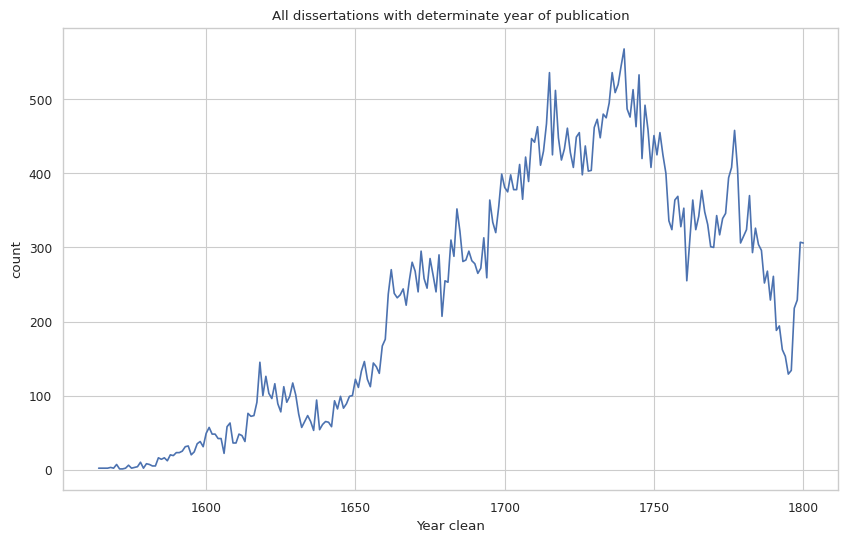

In [201]:
ax_1 = sns.lineplot(df_fig_1)
fig_1 = ax_1.set_title("All dissertations with determinate year of publication").get_figure()
fig_1.savefig("figures/fig_1.svg")
fig_1.savefig("figures/fig_1.png")

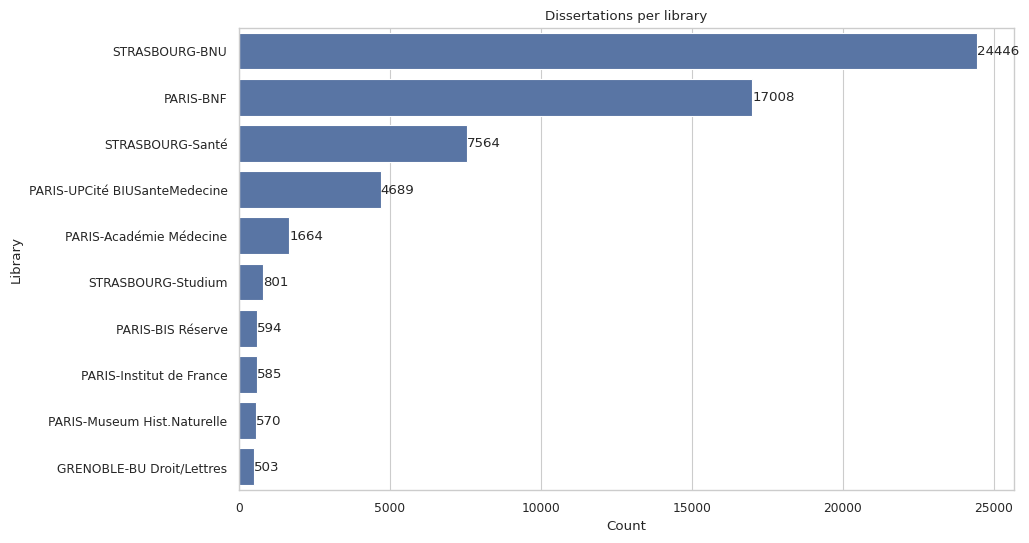

In [202]:
silver_libr = pd.read_csv("../results/silver_libr.csv", index_col=[0], low_memory=False)
libr_cols = [x for x in silver_libr.columns if "Library name" in x and x is not None]
library_names = []
for lc in libr_cols:
    library_names = library_names + silver_libr[lc].to_list()

library_count = pd.Series(library_names).value_counts().reset_index()
library_count.columns = ["Library", "Count"]
ax_2= sns.barplot(library_count.head(10), x="Count", y="Library")
for i in ax_2.containers:
    ax_2.bar_label(i)
fig_2 = ax_2.set_title("Dissertations per library").get_figure()
fig_2.savefig("figures/fig_2.svg", bbox_inches="tight")
fig_2.savefig("figures/fig_2.png", bbox_inches="tight")

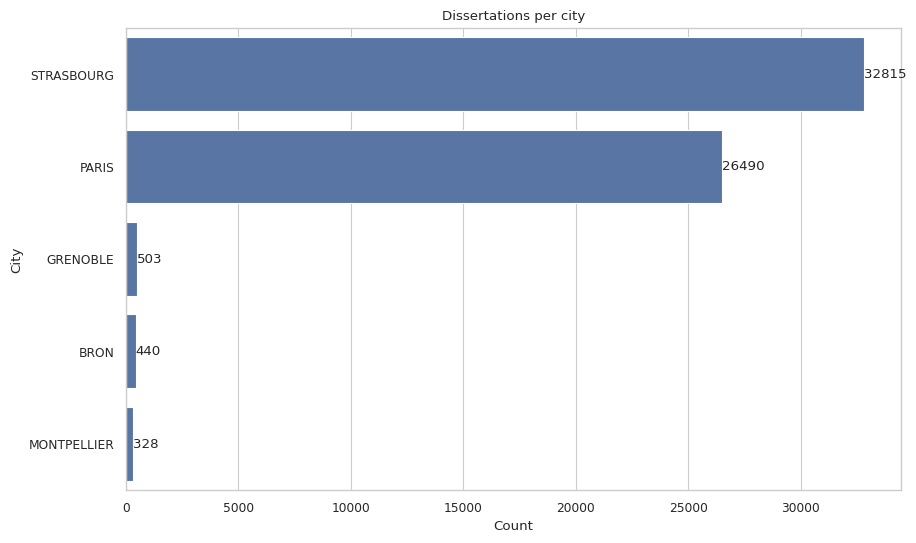

In [203]:
library_place = [str(x).split("-")[0] for x in library_names if str(x) != "nan"]
library_place_count = pd.Series(library_place).value_counts().reset_index()
library_place_count.columns = ["City", "Count"]
lp_count_plot = library_place_count.head(5)
ax_3 = sns.barplot(lp_count_plot, x="Count", y="City")
for i in ax_3.containers:
    ax_3.bar_label(i)
fig_3 = ax_3.set_title("Dissertations per city").get_figure()
fig_3.savefig("figures/fig_3.svg", bbox_inches="tight")
fig_3.savefig("figures/fig_3.png", bbox_inches="tight")

In [204]:
with_stras_all = pd.DataFrame()
for col in libr_cols:
    no_none = silver_libr[silver_libr[col].notna()]
    with_stras = no_none[no_none[col].astype(str).str.contains("STRAS")]
    with_stras_all = pd.concat([with_stras_all, with_stras])

stras_year_count = year_counts(with_stras_all).reset_index()
stras_year_count.columns = ["Year", "Count"]
stras_year_count["Status"] = "In Strasbourg"

In [205]:
no_stras_all = pd.DataFrame()
for col in libr_cols:
    no_none = silver_libr[silver_libr[col].notna()]
    no_stras = no_none[~(no_none[col].astype(str).str.contains("STRAS"))]
    no_stras_all = pd.concat([no_stras_all, no_stras])

no_stras_year_count = year_counts(no_stras_all).reset_index()
no_stras_year_count.columns = ["Year", "Count"]

In [206]:
no_stras_year_count["Status"] = "Outside Strasbourg"
no_stras_year_count

Year  Count              Status
0    1777    375  Outside Strasbourg
1    1778    348  Outside Strasbourg
2    1776    316  Outside Strasbourg
3    1799    313  Outside Strasbourg
4    1784    308  Outside Strasbourg
..    ...    ...                 ...
226  1575      1  Outside Strasbourg
227  1574      1  Outside Strasbourg
228  1568      1  Outside Strasbourg
229  1583      1  Outside Strasbourg
230  1571      1  Outside Strasbourg

[231 rows x 3 columns]

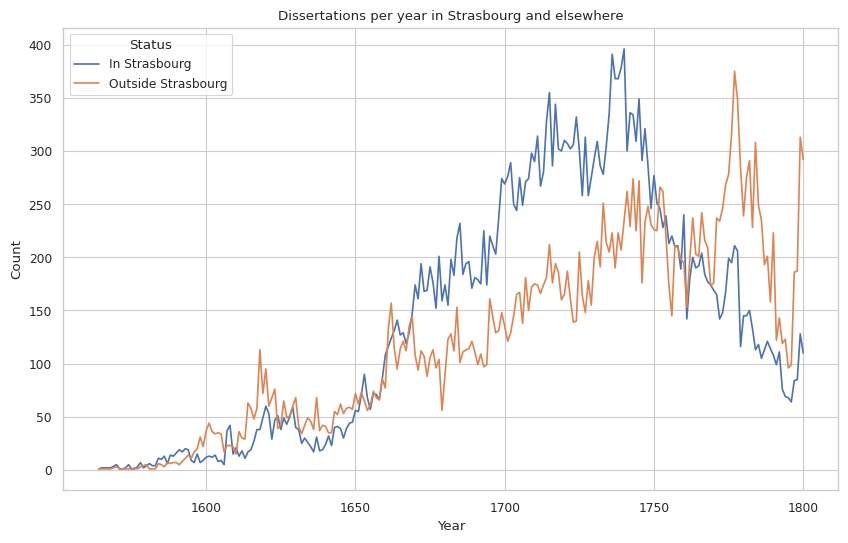

In [207]:
# stras_plot = stras_year_count.merge(no_stras_year_count, on="Year", how="outer").fillna(0)
stras_plot = pd.concat([stras_year_count, no_stras_year_count])
stras_plot["Year"] = stras_plot["Year"].astype(int)
ax_4 = sns.lineplot(data=stras_plot, x="Year", y="Count", hue="Status")
fig_4 = ax_4.set_title("Dissertations per year in Strasbourg and elsewhere").get_figure()
fig_4.savefig("figures/fig_4.svg")
fig_4.savefig("figures/fig_4.png")

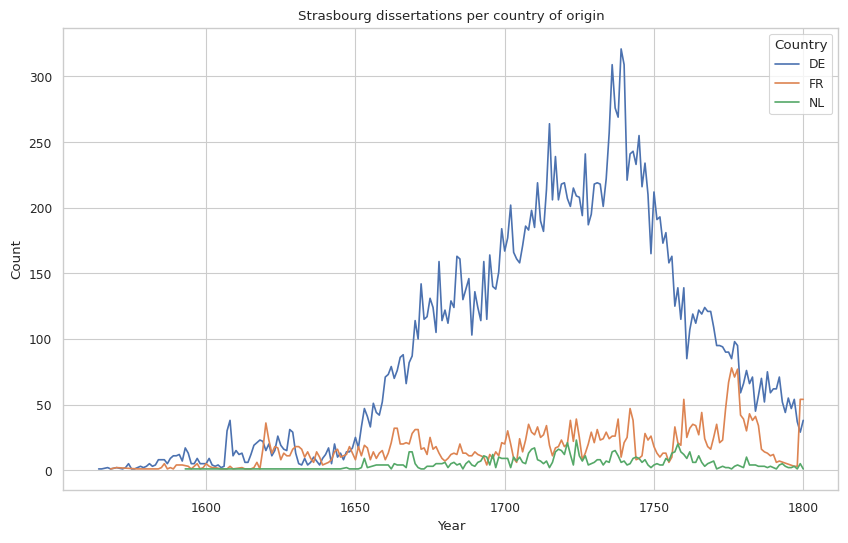

In [208]:
stras_with_cc = with_stras_all[with_stras_all["cc"].notna()]
stras_defrnl = stras_with_cc[(stras_with_cc["cc"] == "DE")|
(stras_with_cc["cc"] == "FR")|(stras_with_cc["cc"] == "NL")]
stras_de_count = year_counts(stras_with_cc[stras_with_cc["cc"] == "DE"]).reset_index()
stras_de_count.columns=["Year", "Count"]
stras_de_count["Country"] = "DE"

stras_fr_count = year_counts(stras_with_cc[stras_with_cc["cc"] == "FR"]).reset_index()
stras_fr_count.columns=["Year", "Count"]
stras_fr_count["Country"] = "FR"
stras_nl_count = year_counts(stras_with_cc[stras_with_cc["cc"] == "NL"]).reset_index()
stras_nl_count.columns=["Year", "Count"]
stras_nl_count["Country"] = "NL"
stras_cc_plot = pd.concat([stras_de_count, stras_fr_count, stras_nl_count])
ax_5 = sns.lineplot(data=stras_cc_plot, x="Year", y="Count", hue="Country")
fig_5 = ax_5.set_title("Strasbourg dissertations per country of origin").get_figure()
fig_5.savefig("figures/fig_5.svg")
fig_5.savefig("figures/fig_5.png")

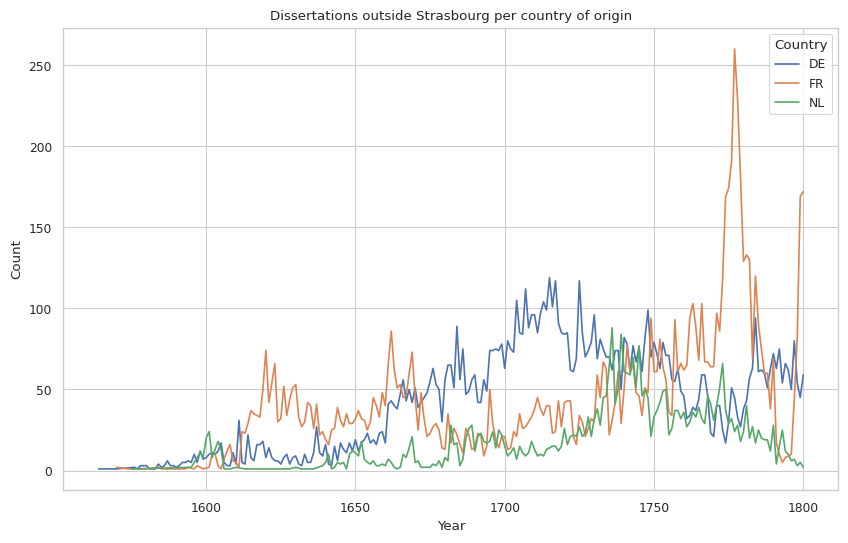

In [209]:
no_stras_with_cc = no_stras_all[no_stras_all["cc"].notna()]
no_stras_defrnl = no_stras_with_cc[(no_stras_with_cc["cc"] == "DE")|
(no_stras_with_cc["cc"] == "FR")|(no_stras_with_cc["cc"] == "NL")]
no_stras_de_count = year_counts(no_stras_with_cc[no_stras_with_cc["cc"] == "DE"]).reset_index()
no_stras_de_count.columns=["Year", "Count"]
no_stras_de_count["Country"] = "DE"
no_stras_fr_count = year_counts(no_stras_with_cc[no_stras_with_cc["cc"] == "FR"]).reset_index()
no_stras_fr_count.columns=["Year", "Count"]
no_stras_fr_count["Country"] = "FR"
no_stras_nl_count = year_counts(no_stras_with_cc[no_stras_with_cc["cc"] == "NL"]).reset_index()
no_stras_nl_count.columns=["Year", "Count"]
no_stras_nl_count["Country"] = "NL"
no_stras_cc_plot = pd.concat([no_stras_de_count, no_stras_fr_count, no_stras_nl_count])
ax_6 = sns.lineplot(data=no_stras_cc_plot, x="Year", y="Count", hue="Country")
fig_6 = ax_6.set_title("Dissertations outside Strasbourg per country of origin").get_figure()
fig_6.savefig("figures/fig_6.svg")
fig_6.savefig("figures/fig_6.png")

In [210]:
# Plotting and analysing places of publication; removing outliers to the West.

places_start_pd = pd.read_csv("../results/silver_place.csv", low_memory=False)[["la", "lo", "cerl_label"]]
places_to_clean_1 = places_start_pd[(places_start_pd.la != "Not found.") &
(places_start_pd.lo != "Not found.")]
places_to_clean_2 = places_to_clean_1[places_to_clean_1.lo.astype("float") > -10.0]
places_count_to_clean = places_to_clean_2[["la", "lo", "cerl_label"]].value_counts().reset_index()
places_count = places_count_to_clean.groupby(["cerl_label"])["count"].sum().reset_index()
places_count_1 = places_count.merge(places_count_to_clean[["lo", "la", "cerl_label"]], how="left", on="cerl_label")
places_count_final = places_count_1.sort_values(by="count", ascending=False).drop_duplicates(subset="cerl_label")

In [211]:
# Geopandas data frame with coordinate reference system (CRS) for mapping
places_gp_map = gp.GeoDataFrame(places_count_final, 
                            geometry=gp.points_from_xy(places_count_final.lo, places_count_final.la), crs="EPSG:4230")

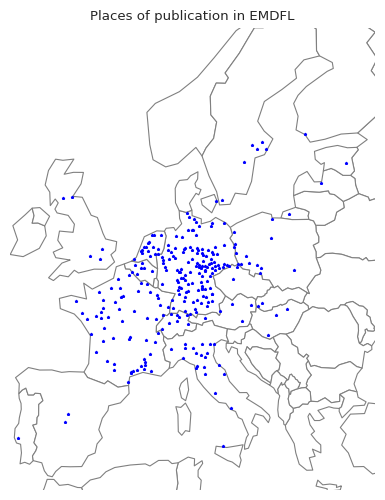

In [212]:
map_eur_df = gp.read_file(r"/home/stefan/Downloads/ne_110m_admin_0_countries.zip")
map_eur_df.crs = "EPSG:4230"
plt_4 = map_eur_df.plot(color="white",
                       edgecolor="grey")
plt_4.set_xlim(-10, 30)
plt_4.set_ylim(35, 68)
plt_4.axis("off")
fig_7 = places_gp_map.plot(ax=plt_4, marker='*', color="blue", markersize=3).set_title("Places of publication in EMDFL").get_figure()
fig_7.set_size_inches((6,6))
fig_7.savefig("figures/fig_7.svg")
fig_7.savefig("figures/fig_7.png")

In [213]:
# Reproject geodataframe for calculating distances

places_gp_calc = places_gp_map.to_crs("EPSG: 4087")

In [214]:
def calc_dist_matr(place_gdf):
    """
    Calculate distance matrix for all places of publication.
    """
    distance_matrix = place_gdf.geometry.apply(lambda g: place_gdf.geometry.distance(g) / 1000).round(2)
    distance_matrix.index = place_gdf["cerl_label"]
    distance_matrix.columns = place_gdf["cerl_label"]
    return(distance_matrix)

dist_matr = calc_dist_matr(places_gp_calc)

top_10_cities = places_gp_calc["cerl_label"].head(10).to_list()
top_10_cities

['Straßburg',
 'Jena',
 'Halle, Saale',
 'Paris',
 'Leipzig',
 'Wittenberg',
 'Leyden',
 'Montpellier',
 'Tübingen',
 'Altdorf']

In [215]:
ten_dicts = []
for cit in top_10_cities:
    cit_ser = dist_matr[cit]
    ten_closest = cit_ser.reset_index()
    ten_closest.columns = ["cerl_label", "Distance"]
    ten_sorted = ten_closest.sort_values(by="Distance").head(11)
    if cit == "Straßburg":
        stras_df = ten_sorted
    ten_sorted_final = ten_sorted[ten_sorted["Distance"] > 0]
    ten_with_count = ten_sorted_final.merge(places_count_final[["cerl_label", "count"]], on="cerl_label")
    av_count = ten_with_count["count"].mean()
    av_dist = ten_with_count["Distance"].median()
    max_dist = ten_with_count["Distance"].max()
    max_count = ten_with_count["count"].max()
    ten_dict = {"Place of publication": cit, "Distance (max)": max_dist,
                "Distance (median)": av_dist, "N diss. (max)": max_count, 
                "N diss. (mean)": av_count}
    ten_dicts.append(ten_dict)

ten_pd = pd.DataFrame(ten_dicts)
display(ten_pd.sort_values(by="Distance (max)"))    
    

Place of publication  Distance (max)  Distance (median)  N diss. (max)  \
1                 Jena           77.62             54.460           1148   
4              Leipzig           79.67             59.480           3872   
2         Halle, Saale           83.18             58.250           4386   
9              Altdorf           92.31             63.690            309   
5           Wittenberg          114.21             87.980           3872   
6               Leyden          121.74             77.390            949   
8             Tübingen          125.44             98.170            591   
0            Straßburg          151.41            121.075           1900   
7          Montpellier          175.01             97.820             52   
3                Paris          202.85            150.185             36   

   N diss. (mean)  
1           117.7  
4           740.4  
2           808.4  
9            65.5  
5           758.0  
6           106.4  
8            68.7  
0           369.2  
7            10.9  
3             8.1

In [216]:
stras_df.iloc[1:,]

cerl_label  Distance
61   Freiburg im Breisgau     65.41
179                Colmar     71.00
151               Durlach     93.80
141                Speyer    111.88
13                  Basel    113.59
86               Mannheim    128.56
184                 Baden    137.85
20             Heidelberg    141.18
8                Tübingen    144.82
205                Épinal    151.41

In [217]:
silver_pers = pd.read_csv("../results/silver_persons.csv", index_col=[0], low_memory=False)
pers_disc = silver_pers[(silver_pers["Faculty"].notna())|(silver_pers["Inferred Faculty"].notna())]
print(f"{len(pers_disc)} records contain pertinent information about persons involved in a dissertation and the faculty of the dissertation.")

20963 records contain pertinent information about persons involved in a dissertation and the faculty of the dissertation.


In [218]:
# finding ten most prolific authors with dissertations that allow for identification of their faculty.
# only persons with a VIAF identifier are uniquely identifiable.

viaf_pd = pd.concat([pers_disc[["Family name 1", "VIAF ID 1", "Faculty", "Inferred Faculty"]], 
                      pers_disc[["Family name 2", "VIAF ID 2", "Faculty", "Inferred Faculty"]], 
                      pers_disc[["Family name 3", "VIAF ID 3", "Faculty", "Inferred Faculty"]]])
viaf_pd["Family name"] = viaf_pd["Family name 1"].fillna(viaf_pd["Family name 2"])
viaf_pd["Family name"] = viaf_pd["Family name"].fillna(viaf_pd["Family name 3"])
viaf_pd["VIAF ID"] = viaf_pd["VIAF ID 1"].fillna(viaf_pd["VIAF ID 2"])
viaf_pd["VIAF ID"] = viaf_pd["VIAF ID"].fillna(viaf_pd["VIAF ID 3"])
viaf_count = viaf_pd["VIAF ID"].value_counts().reset_index()
viaf_name_count = viaf_count.merge(viaf_pd[["VIAF ID", "Family name"]], how="left", on="VIAF ID").drop_duplicates(subset="VIAF ID")
viaf_top_10 = viaf_name_count.head(10)

In [219]:
viaf_top_10_list = viaf_top_10["VIAF ID"].to_list()

# This does not cover the edge case that two contributors in the top ten collaborated on a dissertation. But the chances of that are negiglible.

top_10_recs = viaf_pd[viaf_pd["VIAF ID"].isin(viaf_top_10_list)]
 

       
                                                                    
top_10_for_fac =  top_10_recs.groupby(["VIAF ID"])["Faculty"].value_counts().reset_index()
top_10_for_fac

VIAF ID               Faculty  count
0    http://viaf.org/viaf/12640227              Medicine    186
1    http://viaf.org/viaf/12640227  Medicine, Philosophy      7
2   http://viaf.org/viaf/254489270              Medicine    182
3   http://viaf.org/viaf/254489270  Medicine, Philosophy      9
4    http://viaf.org/viaf/36972056              Medicine    178
5    http://viaf.org/viaf/36972056  Medicine, Philosophy      8
6    http://viaf.org/viaf/44307307              Medicine    172
7    http://viaf.org/viaf/44307307  Medicine, Philosophy     13
8    http://viaf.org/viaf/44307307    Medicine, Theology      1
9    http://viaf.org/viaf/44383224              Medicine    219
10   http://viaf.org/viaf/44383224  Medicine, Philosophy     36
11   http://viaf.org/viaf/44383224            Philosophy      4
12   http://viaf.org/viaf/44383224    Medicine, Theology      1
13   http://viaf.org/viaf/54916062              Medicine    145
14   http://viaf.org/viaf/54916062  Medicine, Philosophy     16
15   http://viaf.org/viaf/54916062            Philosophy      1
16   http://viaf.org/viaf/61657051                   Law    129
17   http://viaf.org/viaf/61657051       Law, Philosophy      2
18   http://viaf.org/viaf/61657051         Law, Theology      2
19   http://viaf.org/viaf/61657051  Philosophy, Theology      2
20   http://viaf.org/viaf/61657051         Law, Medicine      1
21   http://viaf.org/viaf/61657051            Philosophy      1
22   http://viaf.org/viaf/69164343              Medicine    195
23   http://viaf.org/viaf/69164343  Medicine, Philosophy      5
24   http://viaf.org/viaf/71445289              Medicine    189
25   http://viaf.org/viaf/71445289  Medicine, Philosophy      3
26   http://viaf.org/viaf/71445289         Law, Medicine      1
27   http://viaf.org/viaf/99130913                   Law    239
28   http://viaf.org/viaf/99130913              Theology     23
29   http://viaf.org/viaf/99130913         Law, Theology      9

In [220]:
top_10_for_inf_fac = top_10_recs.groupby(["VIAF ID"])["Inferred Faculty"].value_counts().reset_index()
top_10_fac = pd.merge(top_10_for_fac, top_10_for_inf_fac, left_on=["VIAF ID", "Faculty"], 
                      right_on=["VIAF ID", "Inferred Faculty"], how="left")
top_10_fac["Faculty"] = top_10_fac["Faculty"].apply(lambda x: x if x in ["Medicine", "Philosophy", "Theology", "Law"] 
                                                    else "Other")
top_10_fac["Inferred Faculty"] = top_10_fac["Inferred Faculty"].apply(lambda x: x if x in ["Medicine", "Philosophy", "Theology", "Law"] 
                                                    else "Other")
top_10_fac.groupby(["VIAF ID", "Faculty"])["count_x"].sum().reset_index()

VIAF ID     Faculty  count_x
0    http://viaf.org/viaf/12640227    Medicine      186
1    http://viaf.org/viaf/12640227       Other        7
2   http://viaf.org/viaf/254489270    Medicine      182
3   http://viaf.org/viaf/254489270       Other        9
4    http://viaf.org/viaf/36972056    Medicine      178
5    http://viaf.org/viaf/36972056       Other        8
6    http://viaf.org/viaf/44307307    Medicine      172
7    http://viaf.org/viaf/44307307       Other       14
8    http://viaf.org/viaf/44383224    Medicine      219
9    http://viaf.org/viaf/44383224       Other       37
10   http://viaf.org/viaf/44383224  Philosophy        4
11   http://viaf.org/viaf/54916062    Medicine      145
12   http://viaf.org/viaf/54916062       Other       16
13   http://viaf.org/viaf/54916062  Philosophy        1
14   http://viaf.org/viaf/61657051         Law      129
15   http://viaf.org/viaf/61657051       Other        7
16   http://viaf.org/viaf/61657051  Philosophy        1
17   http://viaf.org/viaf/69164343    Medicine      195
18   http://viaf.org/viaf/69164343       Other        5
19   http://viaf.org/viaf/71445289    Medicine      189
20   http://viaf.org/viaf/71445289       Other        4
21   http://viaf.org/viaf/99130913         Law      239
22   http://viaf.org/viaf/99130913       Other        9
23   http://viaf.org/viaf/99130913    Theology       23

In [221]:
top_10_fac_1 = top_10_fac.merge(viaf_top_10, on="VIAF ID")
top_10_fac_1["count_y"] = top_10_fac_1["count_y"].fillna(0)
top_10_fac_1["Count"] = top_10_fac_1["count_x"] + top_10_fac_1["count_y"]
top_10_fac_1["Count"] = top_10_fac_1["Count"].astype(int)
top_10_fac_2 = top_10_fac_1.groupby(["Family name", "Faculty"])["Count"].sum().reset_index()
top_10_fac_2["Total"] = top_10_fac_2.groupby("Family name")["Count"].sum()

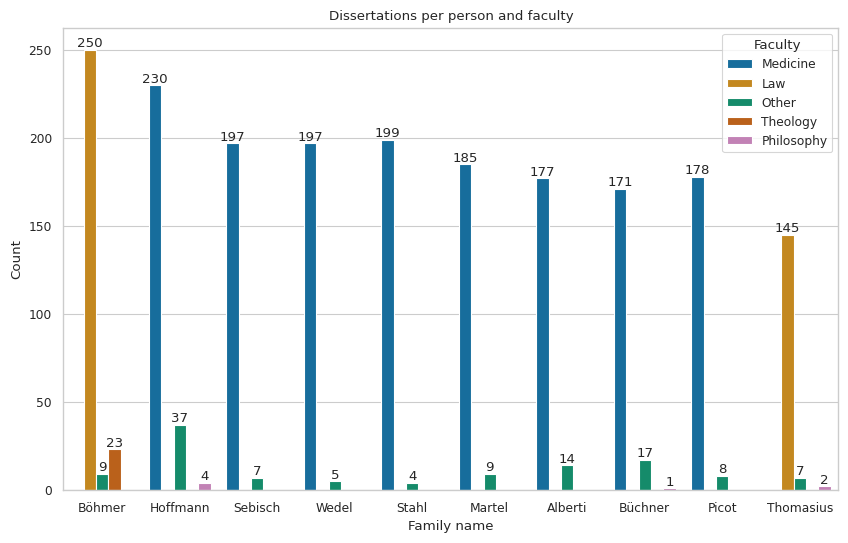

In [222]:
ax = sns.barplot(top_10_fac_2,
    x="Family name", y="Count", hue="Faculty", order = viaf_top_10["Family name"].to_list(), 
    palette="colorblind", errorbar=None, hue_order =["Medicine", "Law", "Other", "Theology", "Philosophy"])
for i in ax.containers:
    ax.bar_label(i,)
fig_8 = ax.set_title("Dissertations per person and faculty").get_figure()
fig_8.savefig("figures/fig_8.svg", bbox_inches="tight")
fig_8.savefig("figures/fig_8.png", bbox_inches="tight")

